For a transform-limited Gaussian pulse, the temporal width after propagating a distance $L$ in glass is

$$\Delta t(L)=\Delta t_0\sqrt{1+\left(\frac{\beta_2L}{\Delta t_0^2}\right)^2}$$

where:

$\Delta t_0$ = initial pulse durateion (intensity FWHM or RMS)

$L$ = thickness of the glass

$\beta_2$ = group velocity dispersion of the glass (units: $s^2/m$)

Group Velocity Dispersion ($\beta_2$):

$$\beta_2=\frac{d^2k}{d\omega^2}$$

where:

$$k(\omega)=\frac{n(\omega)\omega}{c}$$

also:

$$\beta_2(\lambda)=\frac{\lambda^3}{2\pi c^2}\frac{d^2n}{d\lambda^2}$$

In [97]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [98]:
l,a1,a2,a3,b1,b2,b3 = sp.symbols('lambda a_1 a_2 a_3 b_1 b_2 b_3')
n = sp.sqrt(1 + (a1*l**2)/(l**2 - b1) + (a2*l**2)/(l**2 - b2) + (a3*l**2)/(l**2 - b3))
dn_dl = sp.diff(n, (l,1))
ddn_dl = sp.diff(n, (l,2))
ddn_dl

-(4*a_1*lambda**4/(b_1 - lambda**2)**3 + 5*a_1*lambda**2/(b_1 - lambda**2)**2 + a_1/(b_1 - lambda**2) + 4*a_2*lambda**4/(b_2 - lambda**2)**3 + 5*a_2*lambda**2/(b_2 - lambda**2)**2 + a_2/(b_2 - lambda**2) + 4*a_3*lambda**4/(b_3 - lambda**2)**3 + 5*a_3*lambda**2/(b_3 - lambda**2)**2 + a_3/(b_3 - lambda**2) + lambda**2*(a_1*lambda**2/(b_1 - lambda**2)**2 + a_1/(b_1 - lambda**2) + a_2*lambda**2/(b_2 - lambda**2)**2 + a_2/(b_2 - lambda**2) + a_3*lambda**2/(b_3 - lambda**2)**2 + a_3/(b_3 - lambda**2))**2/(-a_1*lambda**2/(b_1 - lambda**2) - a_2*lambda**2/(b_2 - lambda**2) - a_3*lambda**2/(b_3 - lambda**2) + 1))/sqrt(-a_1*lambda**2/(b_1 - lambda**2) - a_2*lambda**2/(b_2 - lambda**2) - a_3*lambda**2/(b_3 - lambda**2) + 1)

In [99]:
dn_func = sp.lambdify((l,a1,a2,a3,b1,b2,b3), dn_dl)
ddn_func = sp.lambdify((l,a1,a2,a3,b1,b2,b3), ddn_dl)
n_func = sp.lambdify((l,a1,a2,a3,b1,b2,b3), n)

In [100]:
a1 =1.03961
b1 = 0.0060007
a2 = 0.23179
b2 = 0.020018
a3 = 1.01047
b3 = 103.5600
l = np.linspace(0.4,1, 100) # wavelength in micrometers
y = ddn_func(l, a1, a2, a3, b1, b2, b3)
c = 3e8 * 1e6 / 1e15 # speed of light in um/fs
beta_2 = (l**3/(2*np.pi*c**2))*y*1e3 # GVD in fs^2/mm

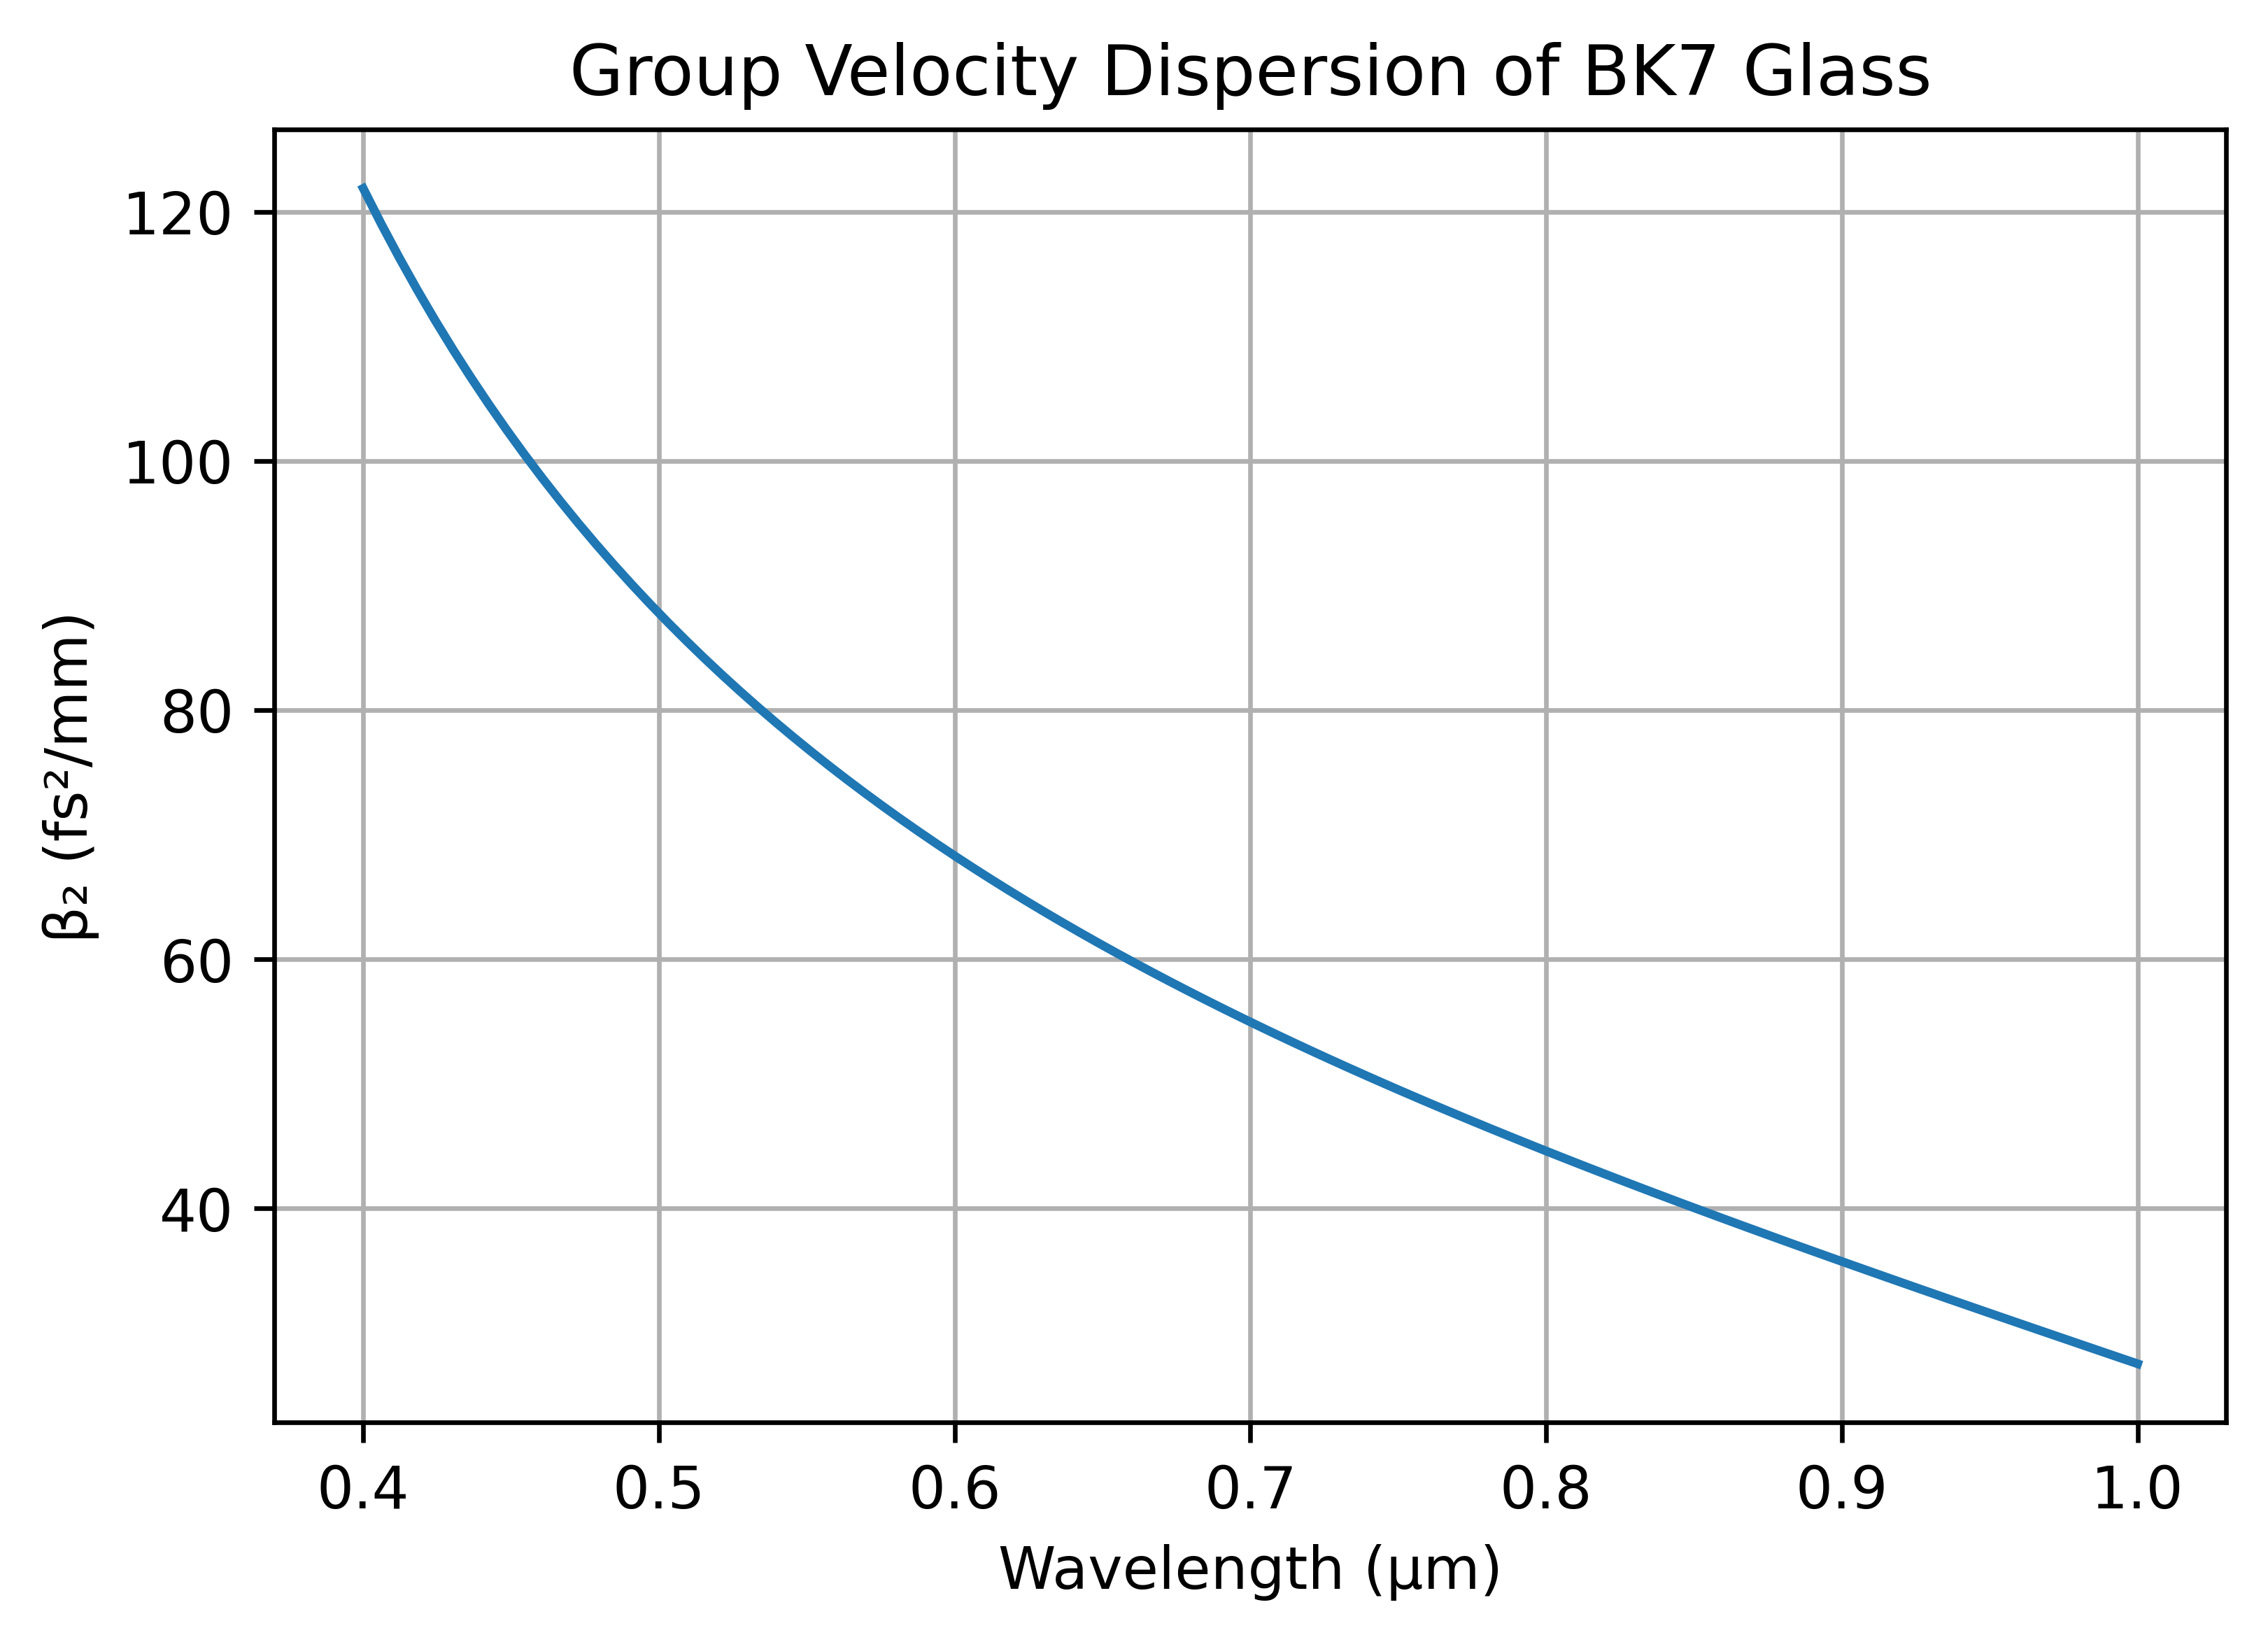

In [101]:
plt.figure(figsize=(6, 4), dpi=600)
plt.plot(l, beta_2)
plt.title("Group Velocity Dispersion of BK7 Glass")
plt.xlabel("Wavelength (μm)")
plt.ylabel("β₂ (fs²/mm)")
plt.grid()
plt.show()

In [102]:
# Calculate Abbe number
l_C,l_d,l_F = 0.6563, 0.58756, 0.4861 # in micrometers for Fraunhofer C, d, F lines
n_C = n_func(l_C, a1, a2, a3, b1, b2, b3)
n_d = n_func(l_d, a1, a2, a3, b1, b2, b3)
n_F = n_func(l_F, a1, a2, a3, b1, b2, b3)
V_D = (n_d - 1)/(n_F - n_C)
V_D

np.float64(64.14158602195886)

In [ ]:
#Chromatic dispersion at 587.5618 nm (Fraunhofer D3 line)
l = 0.5875618 # wavelength in micrometers
CD = dn_func(l,a1,a2,a3,b1,b2,b3) # in 1/um
CD

np.float64(-0.04179937747614153)

In [104]:
# GVD at 587.5618 nm (Fraunhofer D3 line)
GVD = (l**3/(2*np.pi*c**2))*ddn_func(l, a1, a2, a3, b1, b2, b3)*1e3 # GVD in fs^2/mm
GVD

np.float64(70.28093637170252)

In [ ]:
# Dispersion parameter at 587.5618 nm (Fraunhofer D3 line)
D = -2*np.pi*c/l**2*GVD # in ps/(nm km)
D

np.float64(-383.735127623453)

In [106]:
# Group index at 587.5618 nm (Fraunhofer D3 line)
n_g = n_func(l,a1,a2,a3,b1,b2,b3) - l*dn_func(l,a1,a2,a3,b1,b2,b3)
n_g

np.float64(1.541358235588352)